<a href="https://colab.research.google.com/github/jonathanjohnson8/unitary_samples/blob/main/QuantumHoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the google colab where they have the quantum chess code:
https://colab.research.google.com/github/quantumlib/ReCirq/blob/master/docs/quantum_chess/concepts.ipynb#scrollTo=nTC58KTmoCAq

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq
import matplotlib.pyplot as plt
from typing import Dict, Iterable, Optional, Set
import copy
import enum



installing cirq...
     |████████████████████████████████| 48 kB 1.1 MB/s 
     |████████████████████████████████| 541 kB 16.7 MB/s 
     |████████████████████████████████| 56 kB 1.8 MB/s 
     |████████████████████████████████| 593 kB 42.6 MB/s 
     |████████████████████████████████| 1.8 MB 60.8 MB/s 
     |████████████████████████████████| 220 kB 62.0 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 10.1 MB 43.7 MB/s 
     |████████████████████████████████| 145 kB 64.2 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 229 kB 74.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 44 kB 3.2 MB/s 
     |████████████████████████████████| 243 kB 71.7 MB/s 
     |████

In [ ]:
#install new prototypical library
!pip install --quiet git+https://github.com/quantumlib/unitary.git
import unitary.alpha as alpha

     |████████████████████████████████| 1.4 MB 10.2 MB/s 
     |████████████████████████████████| 96 kB 5.5 MB/s 
     |████████████████████████████████| 843 kB 53.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
import enum 
class Square(enum.Enum):
  EMPTY=0
  FULL=1

example_square = alpha.QuantumObject('b1', Square.EMPTY)
print(example_square)

Picture of the numbered board

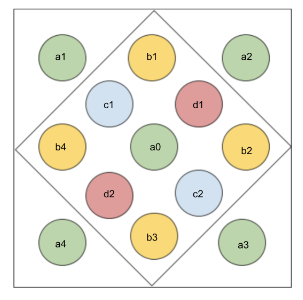

In [ ]:
def defineLevels():
  """Defines the initial configuration of the game according to a specific level.

    This function takes a board and defines what qubits on the board are to be
    occupied or empty according to different levels.
    Each level has a different starting configurations, that is, each level has 
    a unique list of the qubits that start empty.

    Args:
        None
    Output:
        levels: dictionary storing different levels, the values are a list of empty qubits
    """

  # levels = dictionary storing the initial configurations of the game
  # Each key corresponds to a different level and
  # the values of each key are the qubits on the board that are empty and full, respectively
  levels = {}
  levels[1] = [['a1', 'a2', 'c1', 'd1', 'b4', 'b2', 'a4', 'b3', 'a3'], ['b1','a0','d2','c2']]
  levels[2] = [['a1','b1','a2','c1','d1','b4','b2','a4','a3'], ['a0','d2','c2','b3']]
  levels[3] = [['b1','a2','c1','d1','b4','b2','a4','a3'], ['a0','a1','d2','c2','b3']]
  
  return levels

Levels 1 (left), 2 (right), and 3 (bottom)

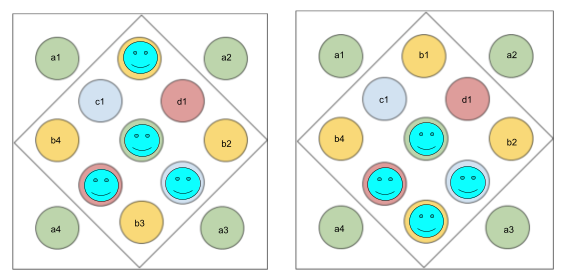

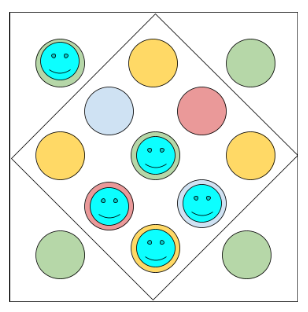

In [ ]:
def initializeBoard(emptyQubits):
  """Initializes the board.

    This function takes a list of empty qubits (representing a level) and 
    initializes the board. All qubits that are not in the list are initialized
    to FULL.

    Args:
        emptyQubits = list of qubits that should be empty at the start (this
                      list comes from the 'levels' dictionary)
    Output:
        board: dictionary storing each qubit on the board
    """
  qubits = ['a0','a1','a2','a3','a4','b1','b2','b3','b4','c1','c2','d1','d2']
  board = {}

  for qubit in qubits:
    if qubit in emptyQubits:
      board[qubit] = alpha.QuantumObject(qubit, Square.EMPTY)
    else:
      board[qubit] = alpha.QuantumObject(qubit, Square.FULL)

  frogs_board = alpha.QuantumWorld(board.values())
  
  return frogs_board, board


In [ ]:
def defineMoves():

  # Defines the allowed moves of the game
  # Input: board = list of qubits
  # Output: allowed moves = dictionary where each key corresponds to a lily pad
  #         and its values are the positions that a frog can jump to from that lily pad                      


  # moves = Dictionary storing the allowed moves of the game
  # The keys are qubits (lily pads) on the board
  # The value of each key is a collection of lists (allowed moves), 
  # where each list has two values. The first value corresponds to the 
  # lily pad that is jumped over and the second value corresponds to the 
  # lily pad that a frog lands on.

  moves = {}
  moves['a0'] = [['c1','a1'],['d1','a2'], ['c2', 'a3'], ['d2','a4']]
  moves['a1'] = [['b1','a2'], ['c1','a0'], ['b4','a4']]
  moves['a2'] = [['b1','a1'], ['b2','a3'], ['d1','a0']]
  moves['a3'] = [['b2','a2'], ['b3','a4'], ['c2','a0']]
  moves['a4'] = [['b4','a1'], ['d2','a0'], ['b3','a3']]

  moves['b1'] = [['d1','b2'], ['a0','b3'], ['c1','b4']]
  moves['b2'] = [['d1','b1'], ['c2','b3'], ['a0','b4']]
  moves['b3'] = [['a0','b1'], ['c2','b2'], ['d2','b4']]
  moves['b4'] = [['c1','b1'], ['a0','b2'], ['d2','b3']]

  moves['c1'] = [['a0','c2']]
  moves['c2'] = [['a0','c1']]

  moves['d1'] = [['a0','d2']]
  moves['d2'] = [['a0','d1']]

  return moves



In [ ]:
def isMoveValid(s, t):   
  """Checks if a move is valid.

    This function takes two qubits (a source and a target) and a 
    dictionary of moves and returns a boolean. It returns whether the 
    desired move is valid or not (i.e. there might not be a frog in
    between soruce and target to jump over).

    Args:
        s: source qubit (square where piece starts)
        t: target qubit (square to move piece to)
    """
  #here, see double occupancy rules in Quantum Chess (there is an implementation of how to determine if the move is "legal")
  for move in moves[s]:
      if move[1] == t: # check that the allowed move is the target move
        # condition: if the qubit that is jumped over (this is the middle lily pad) is not 100% empty
        if move[0] not in emptyQubits and s not in emptyQubits: 
          return True
  return False

In [ ]:
def getMiddleQubit(s,t):
  m = ''
  for move in moves[s]:
    if move[1] == t:
      m = move[0] # middle qubit
  return m

In [ ]:
def canMove(s,t):
  """Checks if a piece can move from s to t.

    Args:
        s: source qubit (square where piece starts)
        t: target qubit (square to move piece to)
    """
  if isMoveValid(s,t):
    if t in emptyQubits:
      return True
  return False

def move(s, t):
  """Performs a normal move. This function swaps the source qubit s
     witht the target qubit t. Assumption: the piece in s can move.

    Args:
        s: source qubit (square where piece starts)
        t: target qubit (square to move piece to)
  
    """
  m = getMiddleQubit(s,t) # middle qubit
  alpha.PhasedMove()(board[s], board[t]) # moves s to t
  # CNOT GATE - captures middle qubit - control qubit is t 
  alpha.quantum_if(board[t]).equals(Square.FULL).then(alpha.Flip())(board[m]) 

In [ ]:
def canSplit(s, t1, t2):
  """Checks if a piece can split.

    Args:
        s: source qubit (square where piece starts)
        t1: target qubit 1 (square to move piece to)
        t2: target qubit 2 (square to move piece to)
    """
  if isMoveValid(s, t1) and isMoveValid(s, t2):
    return True
  else:
    return False 

def split(s, t1, t2):
  """Splits a piece into two positions. Assumption: the piece in s can split.

    Args:
        s: source qubit (square where piece starts)
        t1: target qubit 1 (square to move piece to)
        t2: target qubit 2 (square to move piece to)
    """
  m1 = getMiddleQubit(s,t1) # middle qubit 1
  m2 = getMiddleQubit(s,t2) # middle qubit 2
  alpha.PhasedSplit()(board[s], board[t1], board[t2]) 

  # CNOT GATE - captures middle qubit 1 - control qubit is t1 
  alpha.quantum_if(board[t1]).equals(Square.FULL).then(alpha.Flip())(board[m1]) 
  # CNOT GATE - captures middle qubit 2 - control qubit is t2
  alpha.quantum_if(board[t2]).equals(Square.FULL).then(alpha.Flip())(board[m2])

In [ ]:
def measure(s):
  """Performs a measurement.

    Args:
        s: source qubit 
    """
  measurement = frogs_board.pop([board[s]])  
  return measurement

def peekboard():
  """Updates the board by peeking at every qubit. This function peeks
     at every qubit 100 times and checks if all 100 results are consistent
     with each other. If so, that qubit is either 100% 0 or 100% 1, but if the 
     results are not consistent, then that qubit is in superposition. The 
     board is updated by updating the emptyQubit and fullQubit lists.
    """
  qubits = ['a0','a1','a2','a3','a4','b1','b2','b3','b4','c1','c2','d1','d2']
  emptyQubits = []
  fullQubits = []

  # peeks at every qubit
  for qubit in qubits:
    peeked = frogs_board.peek([board[qubit]], count=100) # peeks 100 times
    samesofar = True 
    const = peeked[0]

    # checks if every peeked result is consistent with the last one
    # (does this 100 times)
    for i in peeked:
      if i != const:
        samesofar = False;
      
    # if all results are consistent, it updates the board accordingly
    # by updating the emptyQubit or fullQubit list
    if samesofar == True:
      if const[0] == Square.FULL:
        fullQubits.append(qubit)
      if const[0] == Square.EMPTY:
        emptyQubits.append(qubit)
  return emptyQubits, fullQubits

In [ ]:
def canEntangle(s, m, t):
  """Checks if a piece can get entangled.

    Args:
        s: source qubit (square where piece starts)
        t: middle qubit (square that is jumped over) (must be in superposition)
        t: target qubit (square to move piece to)
    """
  if isMoveValid(s, t):
    if t in emptyQubits and m not in fullQubits:
      return True
  else:
    return False

def entangle(s, m, t):
  """Moves piece in source qubit s to target qubit t as soon as the qubit m
     collapses to 1. If the qubit m collapses to 0, the piece stays in s.
     Assumption: pieces can get entangled.

    Args:
        s: source qubit (square where piece starts)
        m: control qubit (square that is jumped over) (must be in superposition)
        t: target qubit (square to move piece to)
    """

  # CNOT GATE - control qubit is m
  alpha.quantum_if(board[m]).equals(Square.FULL).then(alpha.Flip())(board[t])
  alpha.quantum_if(board[m]).equals(Square.FULL).then(alpha.Flip())(board[s])
  # CNOT GATE - control qubit is t 
  alpha.quantum_if(board[t]).equals(Square.FULL).then(alpha.Flip())(board[m]) # captures middle piece

Example 1 - A couple of things that can be done with this code

In [ ]:
# Picks a level and initializes the board
levels = defineLevels()
emptyQubits = levels[3][0] # list that keeps track of what qubits are empty
fullQubits = levels[3][1] # list that keeps track of what qubits are full
frogs_board, board = initializeBoard(emptyQubits)
moves = defineMoves()

# does a split move and then an entanglement move
if canSplit('b3', 'b2', 'b4'): 
  print('----------------------------------------')
  print('Split b3 into b2 and b4')
  print()
  print('Full qubit list before split move')
  print(fullQubits) # before move
  print('Empty qubit list before split move')
  print(emptyQubits) # before move
  split('b3', 'b2', 'b4')
  emptyQubits, fullQubits = peekboard()
  print('Full qubit list after split move')
  print(fullQubits) # after move
  print('Empty qubit list after split move')
  print(emptyQubits) # after move

  if canEntangle('a1', 'b4', 'a4'):
    print('----------------------------------------')
    print('Entangling a4 conditioned on b4 (moving a1 to a4, a4 is empty)')
    print()
    print('Full qubit list before entangle move')
    print(fullQubits) # before move
    print('Empty qubit list before entangle move')
    print(emptyQubits) # before move
    entangle('a1','b4','a4')
    emptyQubits, fullQubits = peekboard()
    print('Full qubit list after entangle move')
    print(fullQubits) 
    print('Empty qubit list after entangle move (b4 should be in superposition, not empty)')
    print(emptyQubits) 

    print()
    print("Qubit a4 is now in superposition")

    print()
    print('Full qubit list before collapse')
    print(fullQubits) # before move
    print('Collapse of qubit b4:')
    print(measure('b4'))
    emptyQubits, fullQubits = peekboard()
    print('Full qubit list after collapse')
    print(fullQubits) # after move
    print('Empty qubit list after collapse')
    print(emptyQubits) 

    print()
    print("Qubit a4 has collapsed after the collapse of b4")
    print("Is a4 on the emptyQubits list?")
    print('a4' in emptyQubits)
    print("Is a4 on the fullQubits list?")
    print('a4' in fullQubits)
    print('----------------------------------------')

----------------------------------------
Split b3 into b2 and b4

Full qubit list before split move
['a0', 'a1', 'd2', 'c2', 'b3']
Empty qubit list before split move
['b1', 'a2', 'c1', 'd1', 'b4', 'b2', 'a4', 'a3']
Full qubit list after split move
['a0', 'a1']
Empty qubit list after split move
['a2', 'a3', 'a4', 'b1', 'b3', 'c1', 'd1']
----------------------------------------
Entangling a4 conditioned on b4 (moving a1 to a4, a4 is empty)

Full qubit list before entangle move
['a0', 'a1']
Empty qubit list before entangle move
['a2', 'a3', 'a4', 'b1', 'b3', 'c1', 'd1']
Full qubit list after entangle move
['a0']
Empty qubit list after entangle move (b4 should be in superposition, not empty)
['a2', 'a3', 'b1', 'b3', 'b4', 'c1', 'd1']

Qubit a4 is now in superposition

Full qubit list before collapse
['a0']
Collapse of qubit b4:
[<Square.EMPTY: 0>]
Full qubit list after collapse
['a0']
Empty qubit list after collapse
['a2', 'a3', 'b1', 'b3', 'b4', 'c1', 'd1']

Qubit a4 has collapsed after t

In [ ]:
# does a normal move
if canMove('c2','c1'):
  print('Normal move c2 to c1. Note that here c2 is in superposition and c1 is empty. a0 is full.')
  print()
  print('Empty qubit list before moving c2 to c1')
  print(emptyQubits) # before move
  move('c2','c1')
  emptyQubits, fullQubits = peekboard()
  print('Empty qubit list after moving c2 to c1')
  print(emptyQubits) # after move 
  print('Measuring c1')
  print(measure('c1'))
  emptyQubits, fullQubits = peekboard()
  print('Empty qubit list after measuring c1')
  print(emptyQubits) # after move 


In [ ]:
# TO ADD: if function: has won yet
# measure before moving to target square couldMoveIfTargetEmpty() then measure target, then move or not